In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#Getting the csv file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#checking for the shape of the dataset
data.shape

(4177, 9)

There r 4177 rows and 9 columns

In [4]:
#Checking for the null values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

So there r no values so lets go head and check for info for the type of data

In [5]:
#Checking for type of data using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In the dataset there is a feature of object type,label is of int type and remaining features r of float type.So,lets convert the categorical column to continous data using one of the encoding techniques

In [78]:
#checking the count values for label
data['Rings'].value_counts()


9     686
10    625
8     566
11    472
7     391
6     258
12    251
13    199
14    119
5     113
15    102
16     62
17     53
4      49
18     39
19     32
3      10
Name: Rings, dtype: int64

In [7]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [8]:
#lets use label encoder to convert the categorical data to continous data
from sklearn.preprocessing import LabelEncoder
#lets instantiate the label encoder to one of the variable
lab_enc=LabelEncoder()
#lets fit the data
df=lab_enc.fit_transform(data['Sex'])
pd.Series(df)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

In [9]:
#lets put that df to data
data['Sex']=df
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Now the sex column converted to continous data and now our data set is ful of continous data so lets check the stats of the dataset using describe

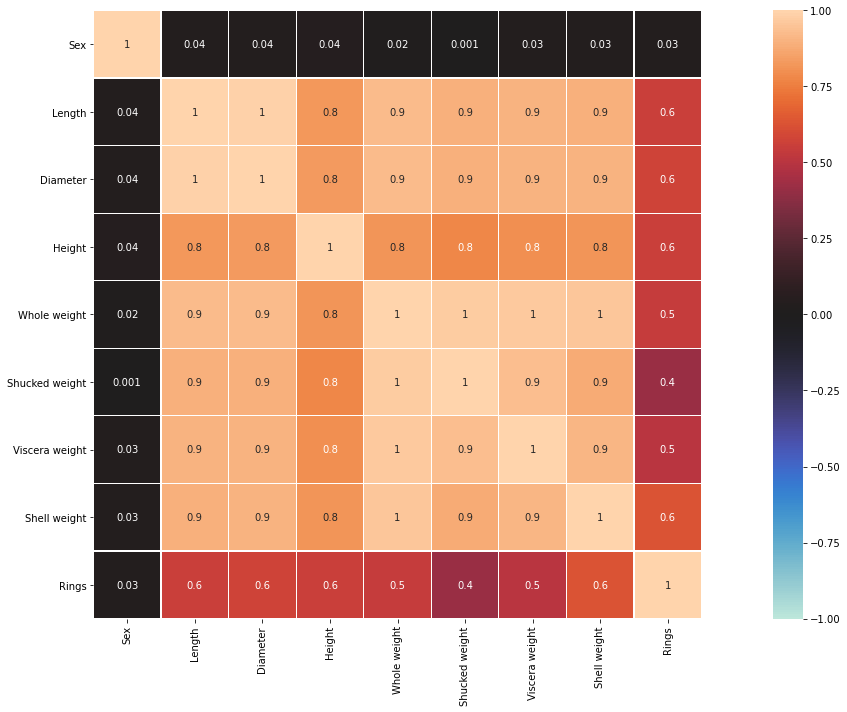

In [10]:
#lets plot heat map to find the multicollinearity
df_corr=data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

After checking the heat map we can say that there is multicollinearity exists with the features the shell weight and whole weight has multicollinearity,viscera weight and whole weight has relation,shucked weight and whole weight has relation and diameter and length has relation of 100% so from this observation i can go ahead and drop some of the features,all the whole weight feature has the combination of shell weight,viscera weight and and shucked weight all the features has less corelation with sex feature

In [11]:
#checking for stats using describe method
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


By looking into the stats the dataset seems to be balanced and the presence of the outliers r also less lets go head and check the data distribution using dist plot for checking the ouliers

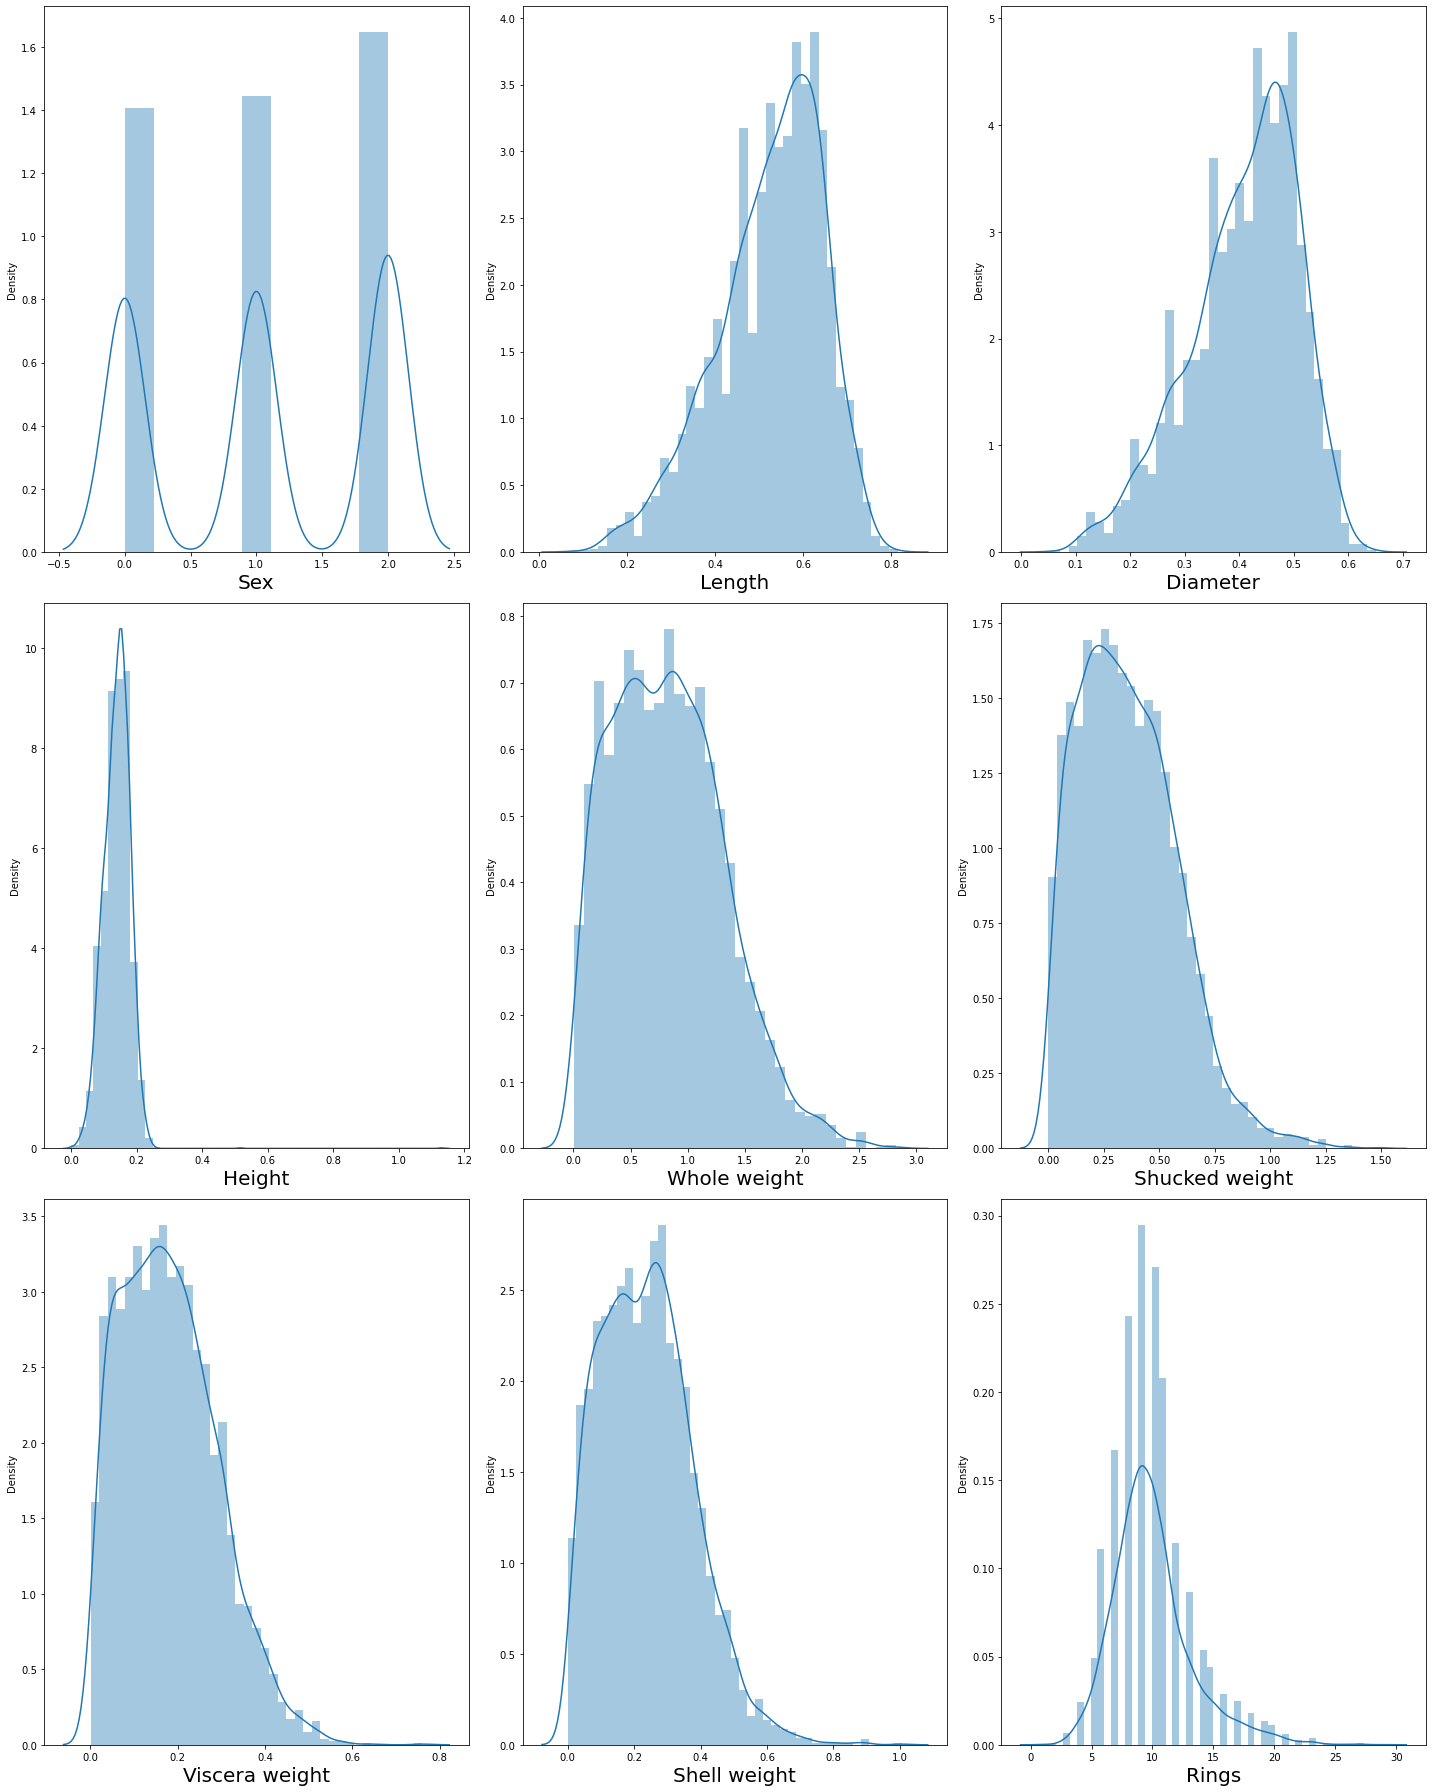

In [12]:
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


From the dist plot we can seethat there is some skewness in the data.Lets check for the outliers using box plot

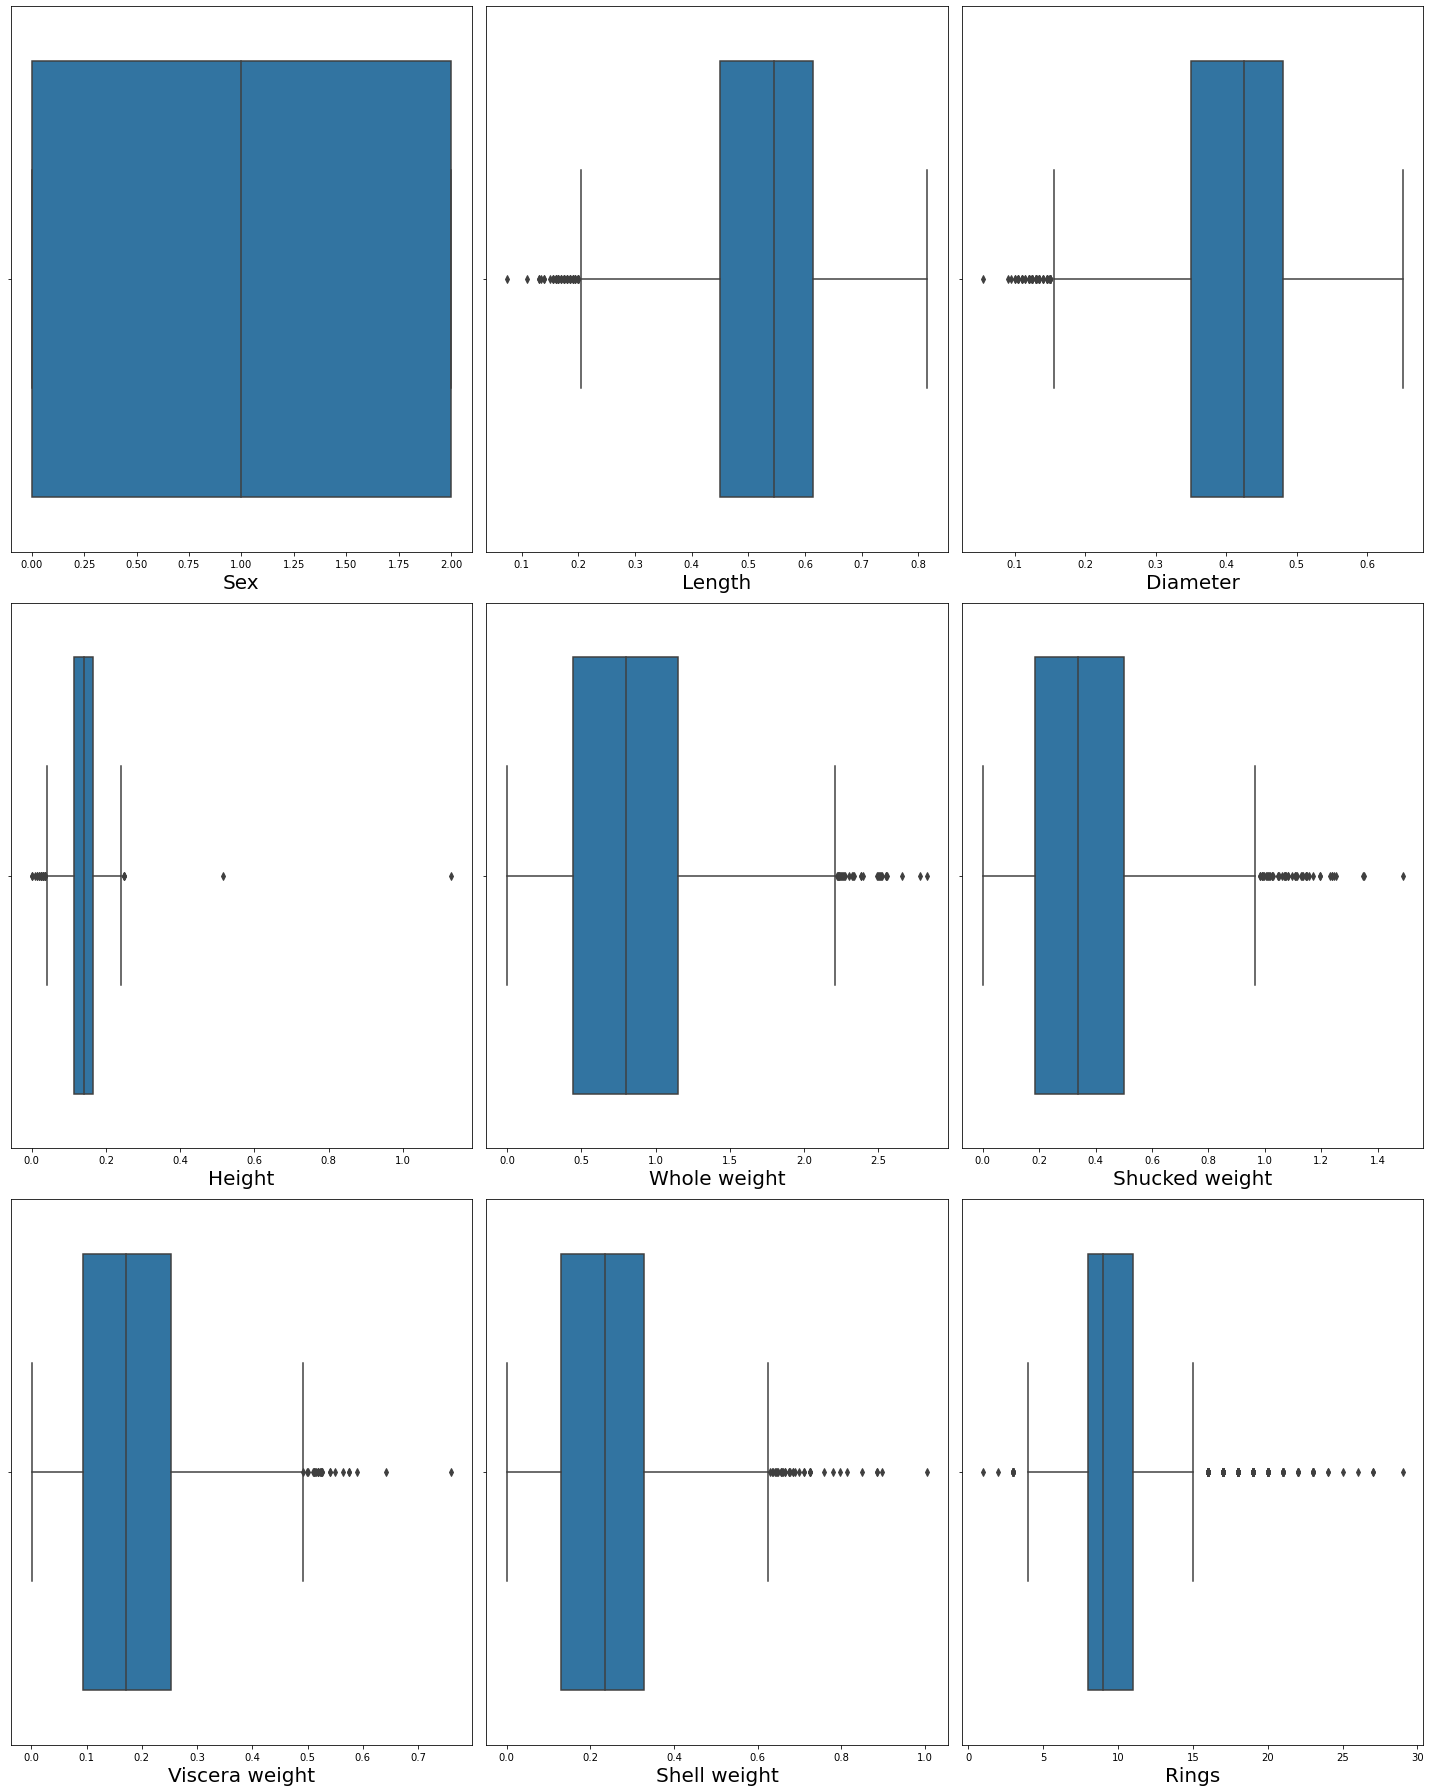

In [13]:
#checking the outliers using boxplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


we r not worried about the label but there r many outliers present in the feature columns so lets go head and treat the ouliers present in the features.As our features r of continous lets go head and use the z_score method to treat the outliers

In [14]:
#checking for skewness
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Both we have +ve skewness and -ve skewness

In [15]:
#importing the stats from the scipy library
from scipy import stats


In [16]:
#lets remove our ouliers using z_score
z=np.abs(stats.zscore(data))#abs=absolute numberprint(z)
print(z)

[[1.15198011 0.57455813 0.43214879 ... 0.72621157 0.63821689 1.57154357]
 [1.15198011 1.44898585 1.439929   ... 1.20522124 1.21298732 0.91001299]
 [1.28068972 0.05003309 0.12213032 ... 0.35668983 0.20713907 0.28962385]
 ...
 [1.15198011 0.6329849  0.67640943 ... 0.97541324 0.49695471 0.28962385]
 [1.28068972 0.84118198 0.77718745 ... 0.73362741 0.41073914 0.02057072]
 [1.15198011 1.54905203 1.48263359 ... 1.78744868 1.84048058 0.64095986]]


In [17]:
#Rows having outliers more than 3 standard deviation
print('Row Numbers \n',np.where(z>3)[0])

Row Numbers 
 [   6   72   81   83  129  163  164  165  165  165  166  166  167  168
  170  181  232  236  236  236  237  237  238  238  239  270  275  277
  278  294  310  313  314  334  351  355  358  358  362  375  416  417
  428  431  433  469  478  480  501  526  526  530  572  628  673  674
  675  678  694  696  696  719  719  720  720  744  754  756  811  891
  891  891 1048 1051 1051 1052 1193 1197 1199 1202 1204 1206 1206 1207
 1207 1207 1207 1209 1209 1257 1417 1417 1418 1422 1426 1427 1427 1427
 1428 1429 1429 1528 1754 1756 1757 1759 1761 1762 1762 1762 1763 1763
 1763 1821 1982 1986 1987 1987 2051 2090 2108 2108 2114 2114 2157 2161
 2176 2180 2199 2201 2208 2209 2274 2275 2305 2334 2334 2334 2335 2344
 2358 2368 2381 2436 2459 2471 2544 2623 2624 2624 2624 2625 2709 2710
 2710 2810 2810 2811 2811 2811 2862 2863 2863 2863 3007 3008 3140 3148
 3149 3149 3151 3151 3188 3193 3280 3359 3427 3427 3427 3599 3599 3628
 3713 3715 3715 3715 3715 3800 3837 3899 3899 3902 3924 3930 39

In [18]:
#Columns having outliers more than 3 standard deviation
print('column numbers \n',np.where(z>3)[1])

column numbers 
 [8 8 7 8 7 7 7 4 5 7 7 8 8 7 6 8 8 1 2 3 1 2 1 2 1 8 8 7 8 8 8 8 8 7 8 8 4
 7 8 8 8 8 8 8 8 8 8 8 8 1 2 8 8 8 8 8 8 8 2 1 2 1 2 1 2 8 8 8 8 4 5 7 6 4
 5 4 5 5 5 5 6 5 6 4 5 6 7 4 5 3 3 5 5 6 5 4 5 6 7 1 2 5 5 5 6 6 5 4 5 6 4
 5 6 5 5 1 1 2 3 7 7 8 1 2 7 7 8 8 8 8 7 8 7 8 8 4 6 8 8 8 8 7 1 8 8 8 5 4
 4 5 6 5 6 5 6 5 6 4 5 6 5 4 5 6 5 7 8 7 7 8 7 8 7 8 8 8 4 5 6 4 5 6 5 4 5
 6 7 4 2 1 2 1 8 8 8 5 5 3 7 6]


In [19]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [20]:
#checking the shape of the data
data.shape

(4027, 9)

We r not dropping the columns data because the columns has the Actual data so we dont want to loose the actual data which will be helpful  to predict the data.After checking the shape we can notice that there r some rows absence(where the outliers present)

In [21]:
#Checking for the % of dataloss
loss_percent=(4177-4027)/4177*100
loss_percent


3.5910940866650707

We have lossed 3.59% of the data

we can notice that there r some more outliers present in the features.lets go head and drop the data which r having the outliers

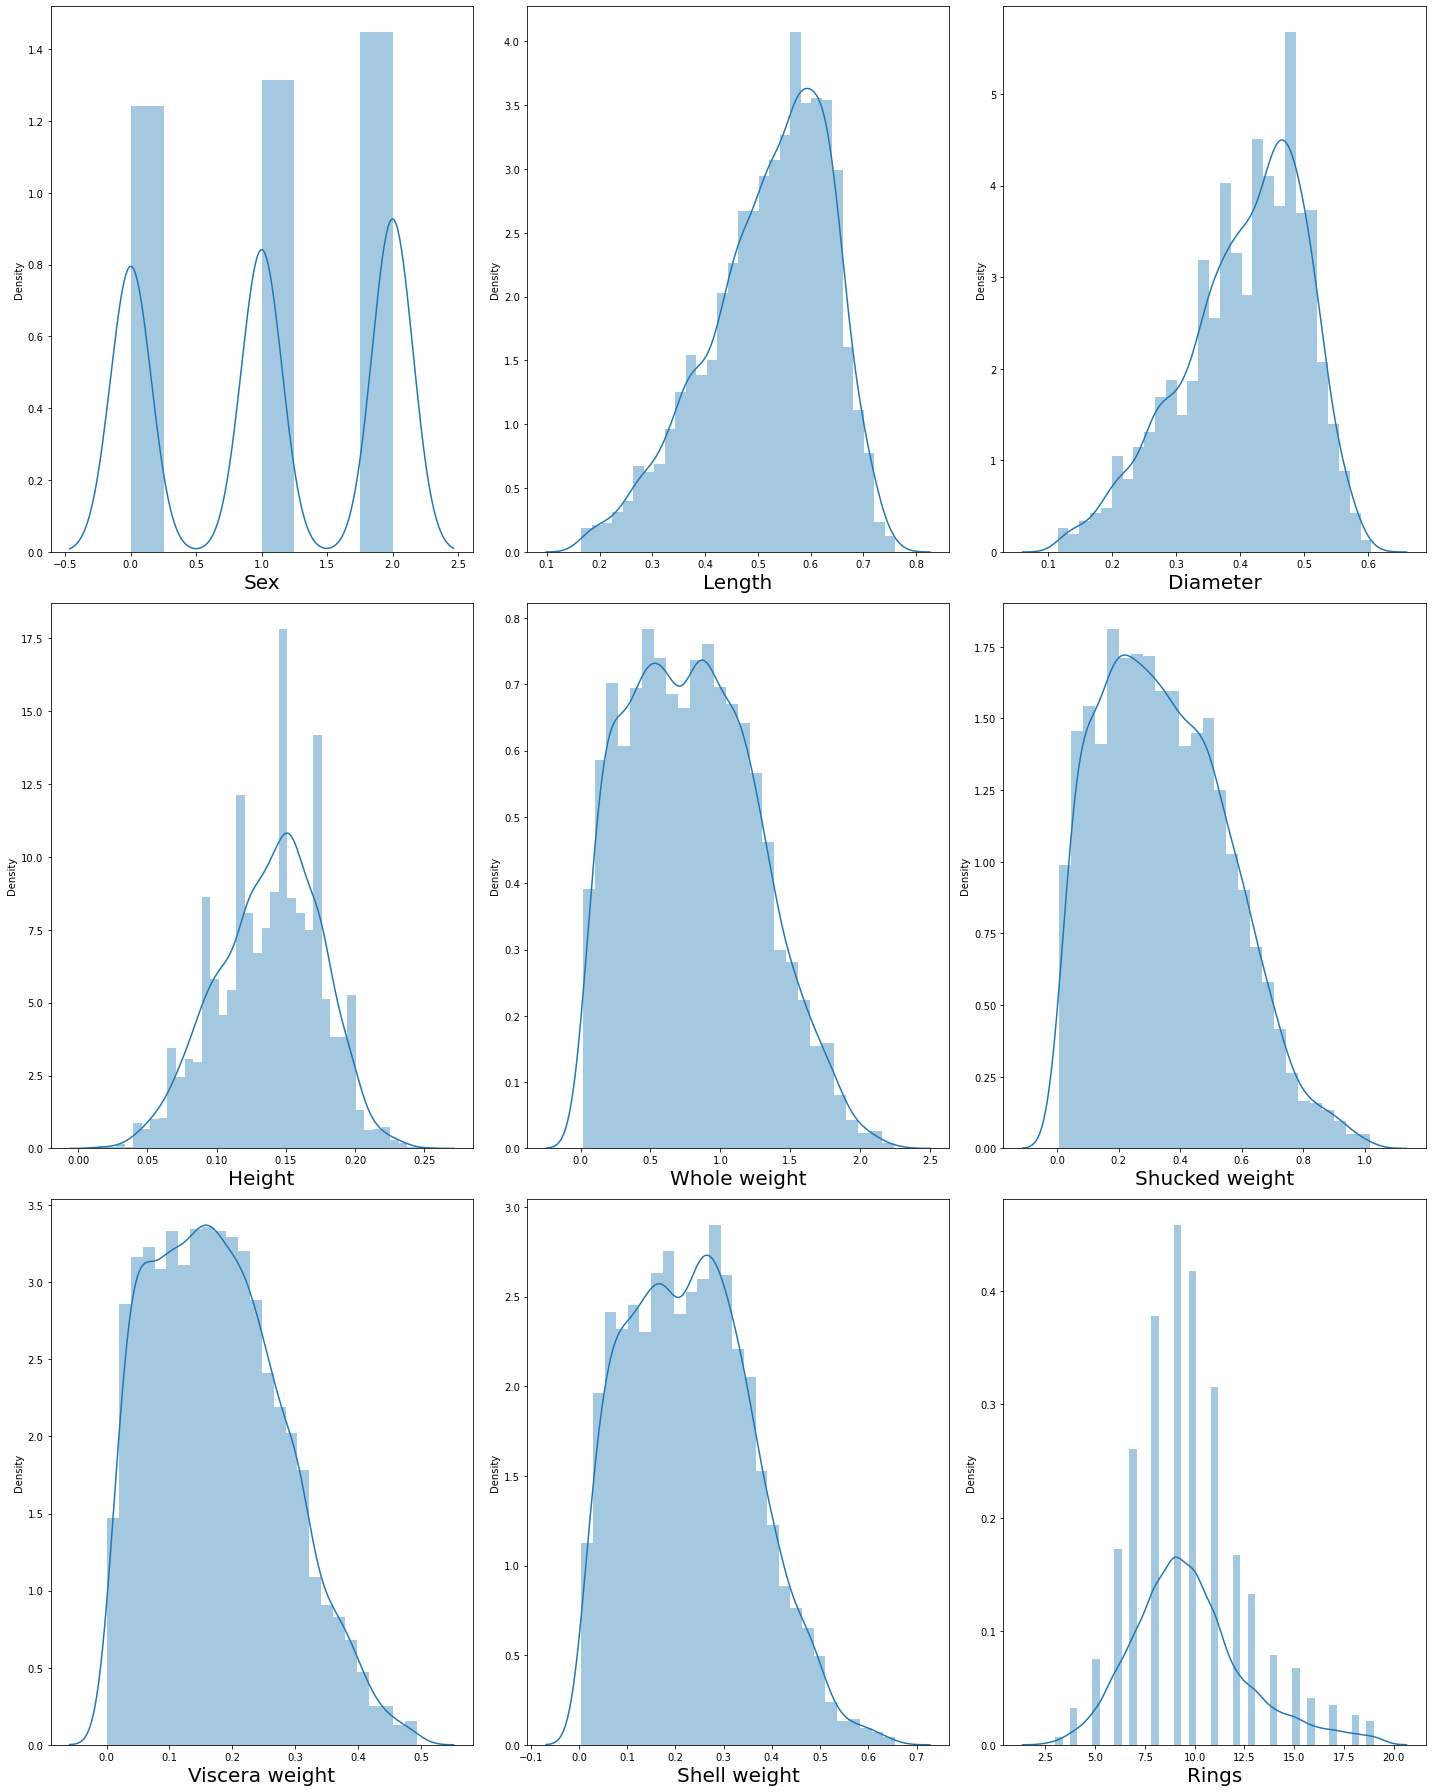

In [22]:
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [127]:
#first lets seperate the features columns and label column
x=data.drop(columns=['Rings'],axis=1)
y=data['Rings']

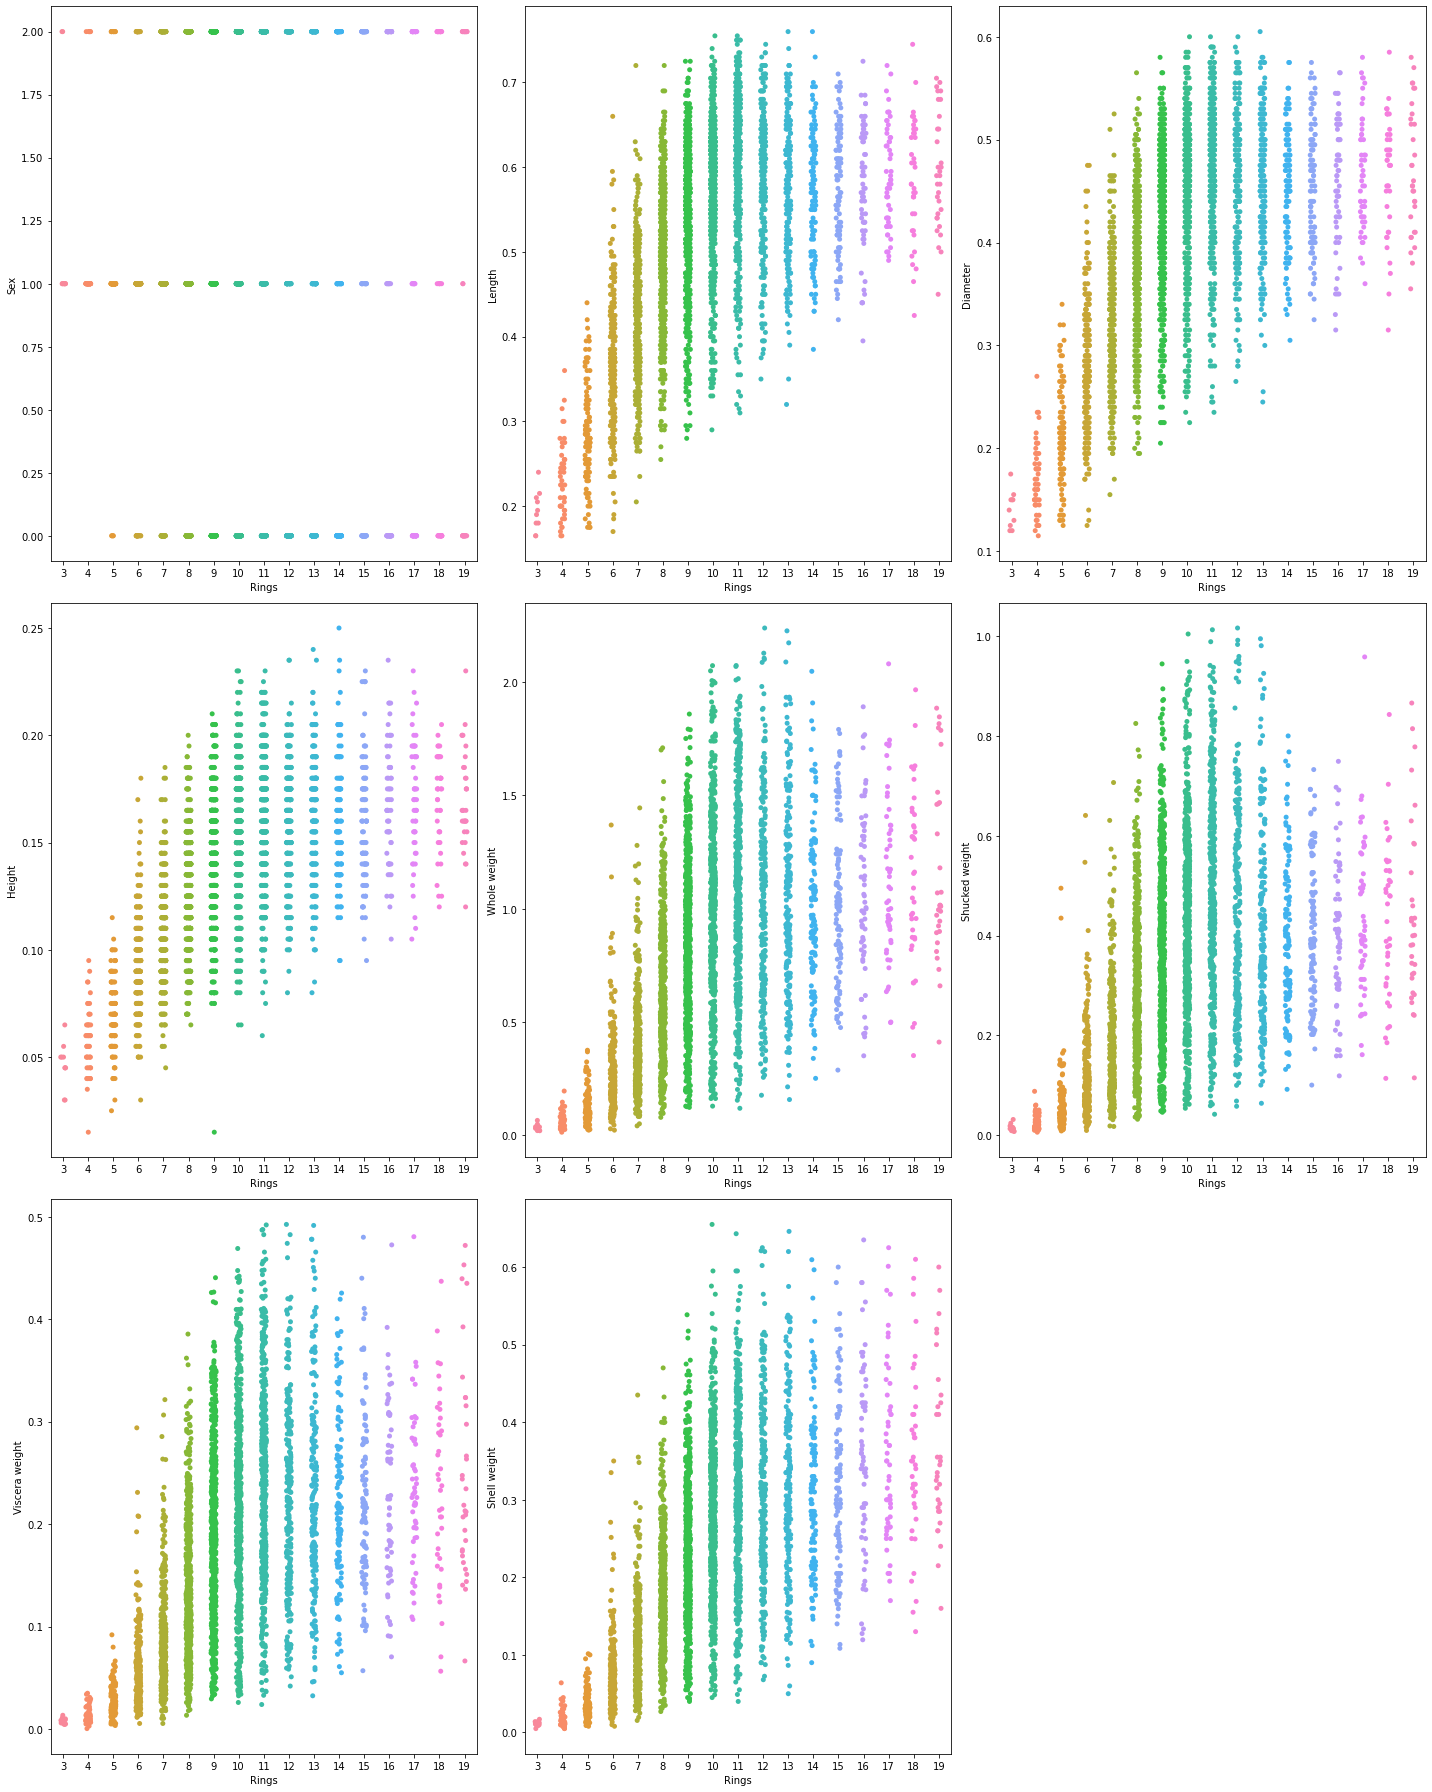

In [128]:
#lets check the relation between features and labels using strip plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


from strip plot we can see that the features and label r linearly independent 

In [129]:
#importing power_transform to remove skewness
from sklearn.preprocessing import power_transform
data_new=power_transform(x)
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()


Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

In [130]:
x=data_new

In [131]:
#Scaling the data using standard scaler since our data looks normal
#importing standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

Since our label has multi classes then the it comes under multi classification problem.so, to deal with this problem we r going to use KNN algorithm,Decision Tree Algorithm,Random forest algorithm and SVM algorithm so lets go head and slipt the model

In [152]:
#importing some of the libraries to build our model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve


In [153]:
#splitting the data into train,test data
#Finding random state
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At Random state',i,'The model performs very well')
        print('At random state: ',i)
        print(accuracy_score(y_train,pred_train)*100)
        print(accuracy_score(y_test,pred_test)*100)
                                                    

In [154]:
print('At Random state',i,'The model performs very well')

At Random state 999 The model performs very well


In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=999)


In [156]:
#Trying to apply with different models
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [157]:
#Training all the classifiers
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)
print('All models are trained')

All models are trained


In [190]:
y_pred=knn.predict(x_train)
#Report table for training data
knn_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Train Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{knn_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Train Result-------------------------
Accuracy Score:44.71%
____________________________________
Classification Report:
             3          4          5           6           7           8  \
precision  0.0   0.537037   0.516129    0.464912    0.412121    0.441532   
recall     0.0   0.783784   0.578313    0.560847    0.498168    0.567358   
f1-score   0.0   0.637363   0.545455    0.508393    0.451078    0.496599   
support    6.0  37.000000  83.000000  189.000000  273.000000  386.000000   

                    9          10          11          12          13  \
precision    0.428333    0.443532    0.487544    0.436782    0.435294   
recall       0.538784    0.484305    0.411411    0.222222    0.266187   
f1-score     0.477252    0.463023    0.446254    0.294574    0.330357   
support    477.000000  446.000000  333.000000  171.000000  139.000000   

                  14         15         16         17    18         19  \
precision   0.434783   0.433333 

In [191]:
y_pred=knn.predict(x_test)
#Report table for testing data
knn_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

knnas=print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{knn_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:23.49%
____________________________________
Classification Report:
             3          4          5          6           7           8  \
precision  0.0   0.173913   0.303030   0.275510    0.319328    0.295238   
recall     0.0   0.333333   0.333333   0.391304    0.322034    0.344444   
f1-score   0.0   0.228571   0.317460   0.323353    0.320675    0.317949   
support    4.0  12.000000  30.000000  69.000000  118.000000  180.000000   

                    9          10          11         12         13  \
precision    0.225455    0.174888    0.235294   0.151515   0.071429   
recall       0.296651    0.217877    0.230216   0.062500   0.033333   
f1-score     0.256198    0.194030    0.232727   0.088496   0.045455   
support    209.000000  179.000000  139.000000  80.000000  60.000000   

                  14    15         16         17    18    19  accuracy  \
precision   0.100000   0.0   0.333333   0.250000

In [192]:
y_pred=dt.predict(x_train)
#Report table for testing data
DT_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Training Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Training Result-------------------------
Accuracy Score:100.00%
____________________________________
Classification Report:
             3     4     5      6      7      8      9     10     11     12  \
precision  1.0   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
recall     1.0   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
f1-score   1.0   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
support    6.0  37.0  83.0  189.0  273.0  386.0  477.0  446.0  333.0  171.0   

              13    14    15    16    17    18    19  accuracy  macro avg  \
precision    1.0   1.0   1.0   1.0   1.0   1.0   1.0       1.0        1.0   
recall       1.0   1.0   1.0   1.0   1.0   1.0   1.0       1.0        1.0   
f1-score     1.0   1.0   1.0   1.0   1.0   1.0   1.0       1.0        1.0   
support    139.0  76.0  78.0  41.0  38.0  23.0  22.0       1.0     2818.0   

           weighted avg  
precision           1.0  
recall         

In [193]:
y_pred=dt.predict(x_test)
#Report table for testing data
DT_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

dtas=print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:19.77%
____________________________________
Classification Report:
             3          4          5          6           7           8  \
precision  0.0   0.133333   0.314286   0.265625    0.321101    0.240000   
recall     0.0   0.166667   0.366667   0.246377    0.296610    0.233333   
f1-score   0.0   0.148148   0.338462   0.255639    0.308370    0.236620   
support    4.0  12.000000  30.000000  69.000000  118.000000  180.000000   

                    9          10          11         12         13  \
precision    0.252809    0.220588    0.150000   0.100000   0.064516   
recall       0.215311    0.251397    0.172662   0.112500   0.066667   
f1-score     0.232558    0.234987    0.160535   0.105882   0.065574   
support    209.000000  179.000000  139.000000  80.000000  60.000000   

                  14         15         16         17    18    19  accuracy  \
precision   0.027778   0.071429   0.076923 

In [194]:
y_pred=rf.predict(x_test)
#Report table for testing data
rf_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Testing Result-------------------------')

rfas=print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{rf_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Testing Result-------------------------
Accuracy Score:25.97%
____________________________________
Classification Report:
             3          4          5          6           7           8  \
precision  0.0   0.187500   0.384615   0.381579    0.363636    0.331551   
recall     0.0   0.250000   0.333333   0.420290    0.338983    0.344444   
f1-score   0.0   0.214286   0.357143   0.400000    0.350877    0.337875   
support    4.0  12.000000  30.000000  69.000000  118.000000  180.000000   

                    9          10          11       12         13         14  \
precision    0.268293    0.226562    0.195531   0.0750   0.074074   0.066667   
recall       0.315789    0.324022    0.251799   0.0375   0.033333   0.023256   
f1-score     0.290110    0.266667    0.220126   0.0500   0.045977   0.034483   
support    209.000000  179.000000  139.000000  80.0000  60.000000  43.000000   

                  15         16         17    18    19  accuracy    macro 

In [195]:
#Lets use SVM(support vector machine algorithm)
y_pred=svc.predict(x_train)
#Report table for training data
svc_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

print('\n--------------------------Training Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{svc_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_train,y_pred)}\n')


--------------------------Training Result-------------------------
Accuracy Score:29.31%
____________________________________
Classification Report:
             3          4          5           6           7           8  \
precision  0.0   0.516129   0.406250    0.357143    0.315364    0.325635   
recall     0.0   0.432432   0.313253    0.264550    0.428571    0.365285   
f1-score   0.0   0.470588   0.353741    0.303951    0.363354    0.344322   
support    6.0  37.000000  83.000000  189.000000  273.000000  386.000000   

                    9          10          11     12     13    14    15    16  \
precision    0.277856    0.240858    0.317690    0.0    0.0   0.0   0.0   0.0   
recall       0.412998    0.428251    0.264264    0.0    0.0   0.0   0.0   0.0   
f1-score     0.332209    0.308313    0.288525    0.0    0.0   0.0   0.0   0.0   
support    477.000000  446.000000  333.000000  171.0  139.0  76.0  78.0  41.0   

             17    18    19  accuracy    macro avg  weighted av

In [196]:
#Lets use SVM(support vector machine algorithm)
y_pred=svc.predict(x_test)
#Report table for testing data
svc_report=pd.DataFrame(classification_report(y_test,y_pred,digits=2,output_dict=True))

print('\n--------------------------Testing Result-------------------------')

svcas=print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{svc_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Testing Result-------------------------
Accuracy Score:28.62%
____________________________________
Classification Report:
             3          4          5          6           7           8  \
precision  0.0   0.285714   0.482759   0.437500    0.398649    0.365079   
recall     0.0   0.333333   0.466667   0.304348    0.500000    0.383333   
f1-score   0.0   0.307692   0.474576   0.358974    0.443609    0.373984   
support    4.0  12.000000  30.000000  69.000000  118.000000  180.000000   

                    9          10          11    12    13    14    15    16  \
precision    0.259868    0.200565    0.235772   0.0   0.0   0.0   0.0   0.0   
recall       0.377990    0.396648    0.208633   0.0   0.0   0.0   0.0   0.0   
f1-score     0.307992    0.266417    0.221374   0.0   0.0   0.0   0.0   0.0   
support    209.000000  179.000000  139.000000  80.0  60.0  43.0  24.0  21.0   

             17    18    19  accuracy    macro avg  weighted avg  
precision   

In [197]:
pip install scikit_plot

Note: you may need to restart the kernel to use updated packages.


In [198]:
import scikitplot as skplt

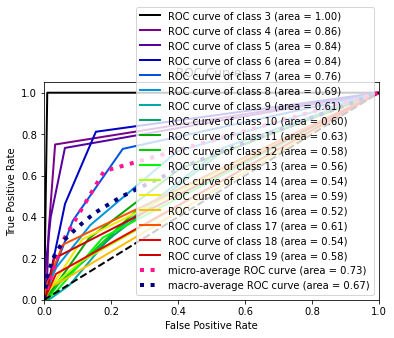

In [199]:
#Lets find Roc Auc score
#KNN
probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

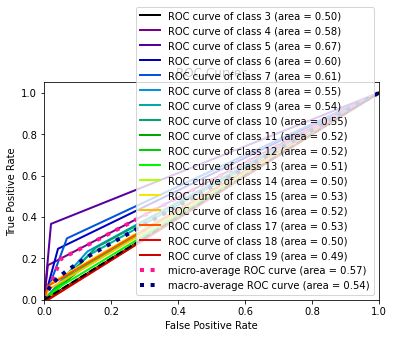

In [200]:
#Decision tree
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

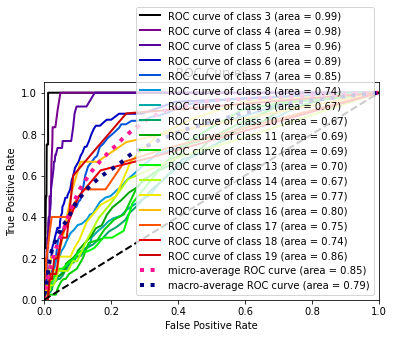

In [201]:
#Random forest
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

In [202]:
#Finding cross val score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  21.927222847278948


In [203]:
scr=cross_val_score(dt,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  20.189695297689685


In [204]:
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  24.485612564153943


In [205]:
cr=cross_val_score(svc,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  24.485612564153943


Models r giving very less accuracy

In [207]:
#Lets check the difference between the cross validation score and the accuracy
knn=23.49-21.927222847278948
knn

1.5627771527210506

In [208]:
Dt=19.77-20.189695297689685
Dt

-0.4196952976896853

In [209]:
rf=25.97-24.485612564153943
rf

1.484387435846056

In [210]:
svc=28.62-24.485612564153943
svc

4.134387435846058

From cross validation score we got know that the difference is less for Decision Tree so lets go head and build model for Decision tree i dont say it is the best model but after checking the values i came to the conclusion

In [211]:
#Lets use Hyper parameter tuning to improve the accuracy 
grid_param={'criterion':['gini','entropy'],'max_depth':range(12,24,3),'min_samples_leaf':range(22,40,2),'min_samples_split':range(10,50,2)}
grid_search=GridSearchCV(dt,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(12, 24, 3),
                         'min_samples_leaf': range(22, 40, 2),
                         'min_samples_split': range(10, 50, 2)})

In [212]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 36, 'min_samples_split': 10}


In [213]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=36, min_samples_split=10)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
#Report table for testing data
DT_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

print('\n--------------------------Test Result-------------------------')

print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')

print('____________________________________')

print(f'Classification Report:\n{DT_report}')

print('_____________________________________')

print(f'confusion matrix:\n{confusion_matrix(y_test,y_pred)}\n')


--------------------------Test Result-------------------------
Accuracy Score:25.31%
____________________________________
Classification Report:
             3          4          5          6           7           8  \
precision  0.0   0.294118   0.365854   0.350649    0.320000    0.295699   
recall     0.0   0.416667   0.500000   0.391304    0.338983    0.305556   
f1-score   0.0   0.344828   0.422535   0.369863    0.329218    0.300546   
support    4.0  12.000000  30.000000  69.000000  118.000000  180.000000   

                    9          10          11    12         13         14  \
precision    0.250000    0.210884    0.197802   0.0   0.162791   0.125000   
recall       0.272727    0.346369    0.258993   0.0   0.116667   0.046512   
f1-score     0.260870    0.262156    0.224299   0.0   0.135922   0.067797   
support    209.000000  179.000000  139.000000  80.0  60.000000  43.000000   

             15    16    17    18    19  accuracy    macro avg  weighted avg  
precision   0

After grid search cv our model accuracy got improved 

In [71]:
#comparing original v/s predicted data
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df


,Original,Predicted
0,7,8
1,11,10
2,9,11
3,16,11
4,15,8
...,...,...
1204,6,6
1205,9,8
1206,10,11
1207,7,7


In [72]:
#model saving
import pickle
filename='abalone.pkl'
pickle.dump(dt,open(filename,'wb'))